In [ ]:
Problem Set 3

In [ ]:
Question 1

In [1]:
#Step 1. Import the necessary libraries
import pandas as pd


In [4]:
#Step 2. Import the dataset

url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"


In [5]:
#Step 3. Assign it to a variable called users
users = pd.read_csv(url, sep='|')
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
#Step 4. Discover what is the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("\nMean Age per Occupation:")
print(mean_age_per_occupation)


Mean Age per Occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [8]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least
users['male'] = users['gender'].apply(lambda x: 1 if x == 'M' else 0)
male_users_ratio = users.groupby('occupation')['male'].mean().sort_values(ascending=False)
print("\nMale ratio per occupation:\n", male_users_ratio)



Male ratio per occupation:
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: male, dtype: float64


In [9]:
#Step 6. For each occupation, calculate the minimum and maximum ages
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\nMinimum and Maximum Age per Occupation:")
print(min_max_age_per_occupation)


Minimum and Maximum Age per Occupation:
               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [10]:
# Step 7: For each combination of occupation and sex, calculate the mean age
mean_age_per_occupation_and_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nMean Age per Occupation and Gender:")
print(mean_age_per_occupation_and_sex)


Mean Age per Occupation and Gender:
occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028

In [11]:
Step 8. For each occupation present the percentage of women and men
gender_ocup = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occup_count = users.groupby(['occupation']).count()
occup_gender = gender_ocup.div(occup_count, level = "occupation")
occup_gender.loc[:, 'gender']

occupation     gender
administrator  F         0.455696
               M         0.544304
artist         F         0.464286
               M         0.535714
doctor         M         1.000000
educator       F         0.273684
               M         0.726316
engineer       F         0.029851
               M         0.970149
entertainment  F         0.111111
               M         0.888889
executive      F         0.093750
               M         0.906250
healthcare     F         0.687500
               M         0.312500
homemaker      F         0.857143
               M         0.142857
lawyer         F         0.166667
               M         0.833333
librarian      F         0.568627
               M         0.431373
marketing      F         0.384615
               M         0.615385
none           F         0.444444
               M         0.555556
other          F         0.342857
               M         0.657143
programmer     F         0.090909
               M         0

In [ ]:
Question 2

In [12]:
# Step 1: Import the necessary libraries
import pandas as pd

In [17]:
# Step 2: Import the dataset from the given URL
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

In [18]:
# Step 3: Assign the dataset to a variable called euro12
print(euro12.head())

             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0   

   Penalties not scored  ...  Saves ma

In [19]:
# Step 4: Select only the Goal column
goals = euro12['Goals']
print("\nGoals column:\n", goals)


Goals column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [20]:
# Step 5: How many teams participated in the Euro 2012?
num_teams = euro12['Team'].nunique()
print("\nNumber of teams participated in Euro 2012:", num_teams)


Number of teams participated in Euro 2012: 16


In [21]:
# Step 6: What is the number of columns in the dataset?
num_columns = euro12.shape[1]
print("\nNumber of columns in the dataset:", num_columns)


Number of columns in the dataset: 35


In [22]:
# Step 7: View only the columns Team, Yellow Cards, and Red Cards, and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nDiscipline DataFrame:\n", discipline)


Discipline DataFrame:
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [118]:
# Step 8: Sort the teams by Red Cards, then by Yellow Cards
team_sorting = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)
print("\nTeams sorted by Red Cards then Yellow Cards:\n", team_sorting)



Teams sorted by Red Cards then Yellow Cards:
                    Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [24]:
# Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow_cards = euro12['Yellow Cards'].mean()
print("\nMean Yellow Cards per team:", mean_yellow_cards)


Mean Yellow Cards per team: 7.4375


In [27]:
#Step 10. Filter teams that scored more than 6 goals
Top_Performing_Teams = euro12[euro12['Goals'] > 6]['Team']
print("\nTeams that scored more than 6 goals:\n", Top_Performing_Teams)



Teams that scored more than 6 goals:
 5     Germany
13      Spain
Name: Team, dtype: object


In [29]:
#Step 11. Select the teams that start with G
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]['Team']
print("\nTeams starting with 'G':")
print(teams_starting_with_G)



Teams starting with 'G':
5    Germany
6     Greece
Name: Team, dtype: object


In [30]:
# Step 12: Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print("\nFirst 7 columns:\n", first_7_columns)


First 7 columns:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13             

In [31]:
# Step 13: Select all columns except the last 3
all_except_last_3 = euro12.iloc[:, :-3]
print("\nAll columns except the last 3:\n", all_except_last_3)


All columns except the last 3:
                    Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
1

In [32]:
# Step 14: Present only the Shooting Accuracy from England, Italy, and Russia
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print("\nShooting Accuracy of England, Italy, and Russia:\n", shooting_accuracy)


Shooting Accuracy of England, Italy, and Russia:
        Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


In [ ]:
Question 3

In [33]:
#Step 1. Import the necessary libraries
import pandas as pd
import numpy as np

In [34]:
# Step 2: Create 3 different Series
# Random numbers from 1 to 4
series1 = pd.Series(np.random.randint(1, 5, size=100))

# Random numbers from 1 to 3
series2 = pd.Series(np.random.randint(1, 4, size=100))

# Random numbers from 10,000 to 30,000
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

In [35]:
# Step 3: Create a DataFrame by joining the Series by column
df = pd.concat([series1, series2, series3], axis=1)

In [36]:
# Step 4: Change the name of the columns to 'bedrs', 'bathrs', 'price_sqr_meter'
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print("DataFrame with renamed columns:\n", df.head())

DataFrame with renamed columns:
    bedrs  bathrs  price_sqr_meter
0      4       2            25657
1      3       3            23684
2      1       1            21236
3      4       1            22410
4      4       1            21931


In [41]:
# Step 5: Create a one-column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.concat([series1, series2, series3], axis=0).reset_index(drop=True)
bigcolumn_df = bigcolumn.to_frame(name='bigcolumn')
print("\nBigcolumn DataFrame:\n", bigcolumn_df)


Bigcolumn DataFrame:
      bigcolumn
0            4
1            3
2            1
3            4
4            4
..         ...
295      20644
296      27294
297      19076
298      11585
299      25013

[300 rows x 1 columns]


In [44]:
# Step 6: Verify if it only goes until index 99
print("\nDoes it go only until index 99? Length of bigcolumn:", len(bigcolumn_df), 
      "| True or False:", len(bigcolumn_df) == 100)



Does it go only until index 99? Length of bigcolumn: 300 | True or False: False


In [45]:
# Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn_df_reindexed = bigcolumn_df.reindex(range(300))
print("\nReindexed DataFrame:\n", bigcolumn_df_reindexed)


Reindexed DataFrame:
      bigcolumn
0            4
1            3
2            1
3            4
4            4
..         ...
295      20644
296      27294
297      19076
298      11585
299      25013

[300 rows x 1 columns]


In [ ]:
Question 4

In [52]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

In [54]:
# Step 2: Import the dataset from the attached file 'wind.txt'
data = pd.read_csv(r"C:\Users\Nithin\anaconda3\PS3\wind.txt", sep=r'\s+')

In [55]:
#Step 3: Assign it to a variable called 'data' and replace the first 3 columns by a proper datetime index
data['datetime'] = pd.to_datetime({'year': 1900 + data['Yr'], 'month': data['Mo'], 'day': data['Dy']})
data = data.drop(['Yr', 'Mo', 'Dy'], axis=1).set_index('datetime')

In [60]:
# Step 4: Year 2061? Fix it by creating and applying a function
def fix_year(x):
    if x.year > 1989:
        return x.replace(year=x.year - 100)
    else:
        return x
data.index = data.index.map(fix_year)


In [63]:
# Step 5: Ensure the index is datetime64[ns]
print("data type is:", data.index.dtype)


data type is: datetime64[ns]


In [64]:
# Step 6: Compute how many values are missing for each location
missing_values = data.isnull().sum()
print("\nMissing values per location:\n", missing_values)


Missing values per location:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [65]:
# Step 7: Compute how many non-missing values there are in total
non_missing_total = data.notnull().sum().sum()
print("\nTotal non-missing values:", non_missing_total)


Total non-missing values: 78857


In [66]:
# Step 8: Calculate the mean windspeeds across all locations and all times
mean_windspeed = data.mean().mean()
print("\nMean windspeed across all locations and times:", mean_windspeed)


Mean windspeed across all locations and times: 10.227982360836938


In [67]:
# Step 9: Create loc_stats with min, max, mean, and std for each location
loc_stats = data.describe().T[['min', 'max', 'mean', 'std']]
print("\nLocation statistics (min, max, mean, std):\n", loc_stats)


Location statistics (min, max, mean, std):
       min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794


In [68]:
# Step 10: Create day_stats with min, max, mean, and std for each day across all locations
day_stats = data.aggregate(['min', 'max', 'mean', 'std'], axis=1)
print("\nDay statistics (min, max, mean, std):\n", day_stats.head())



Day statistics (min, max, mean, std):
              min    max       mean       std
datetime                                    
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356


In [69]:
# Step 11: Average windspeed in January for each location
january_data = data[data.index.month == 1]
january_avg = january_data.mean()
print("\nAverage windspeed in January per location:\n", january_avg)


Average windspeed in January per location:
 RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [71]:
# Step 12: Downsample to yearly frequency and calculate the mean
yearly_wind_frequency = data.resample('YS').mean()
print("Yearly wind frequency:\n", yearly_wind_frequency)


Yearly wind frequency:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
datetime                                                                     
1961-01-01  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-01-01  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-01-01  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-01-01  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-01-01  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-01-01  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-01-01  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-01-01  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-01-01  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-01-01  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-01-01  11.273123   9.095178  11.088

In [72]:
# Step 13: Downsample to monthly frequency and calculate the mean
monthly_wind_frequency = data.resample('MS').mean()
print("Monthly wind frequency:\n", monthly_wind_frequency)


Monthly wind frequency:
                   RPT        VAL        ROS       KIL        SHA        BIR  \
datetime                                                                      
1961-01-01  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-01  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-01  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-01  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-01   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-01   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-01  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-01   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-01  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-01  16.175484  13.7

In [73]:
# Step 14: Downsample to weekly frequency and calculate the mean
weekly_wind_frequency = data.resample('W-SUN').mean()
print("Weekly wind frequency:\n", weekly_wind_frequency)


Weekly wind frequency:
                   RPT        VAL        ROS        KIL        SHA        BIR  \
datetime                                                                       
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.9

In [74]:
# Step 15: Calculate statistics for the first 52 weeks
weekly_statistics = data.resample('W-SUN').agg(['min', 'max', 'mean', 'std']).iloc[:52]
print("Weekly statistics (first 52 weeks):\n", weekly_statistics)


Weekly statistics (first 52 weeks):
               RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
datetime                                                                 
1961-01-01  15.04  15.04  15.040000       NaN  14.96  14.96  14.960000   
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1

In [ ]:
Question 5

In [75]:
# Step 1: Import the necessary libraries
import numpy as np
import pandas as pd

In [91]:
# Step 2: Import the dataset from the given address
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

In [92]:
# Step 3: Assign it to a variable called chipo
chipo = pd.read_csv(url, sep='\t')
print("Dataset successfully loaded!")

Dataset successfully loaded!


In [93]:
# Step 4: See the first 10 entries
print("First 10 entries of dataset \n", chipo.head(10))

First 10 entries of dataset 
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3

In [90]:
# Step 5: What is the number of observations in the dataset?
print(f"Number of observations in the dataset {len(chipo)}")


Number of observations in the dataset 4622


In [94]:
# Step 6: What is the number of columns in the dataset?
num_columns = chipo.shape[1]
print("\nNumber of columns in the dataset:", num_columns)


Number of columns in the dataset: 5


In [95]:
# Step 7: Print the name of all the columns
print("\nColumn names:\n", chipo.columns)


Column names:
 Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [96]:
# Step 8: How is the dataset indexed?
print("\nDataset index:\n", chipo.index)


Dataset index:
 RangeIndex(start=0, stop=4622, step=1)


In [97]:
# Step 9: Which was the most-ordered item?
most_ordered_item = chipo.groupby('item_name')['quantity'].sum().idxmax()
print("\nMost-ordered item:", most_ordered_item)



Most-ordered item: Chicken Bowl


In [98]:
# Step 10: For the most-ordered item, how many items were ordered?
most_ordered_quantity = chipo.groupby('item_name')['quantity'].sum().max()
print("\nQuantity of most-ordered item:", most_ordered_quantity)


Quantity of most-ordered item: 761


In [99]:
# Step 11: What was the most ordered item in the choice_description column?
most_ordered_choice = chipo.groupby('choice_description')['quantity'].sum().idxmax()
print("\nMost-ordered item in choice_description:", most_ordered_choice)


Most-ordered item in choice_description: [Diet Coke]


In [100]:
# Step 12: How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
print("\nTotal items ordered:", total_items_ordered)


Total items ordered: 4972


In [102]:
# Step 13: Convert item price to float

# Convert the 'item_price' column to string type if it's not already
chipo['item_price'] = chipo['item_price'].astype(str)

# Remove the dollar sign and convert the column to float
chipo['item_price'] = chipo['item_price'].str.replace(r'\$', '', regex=True).astype(float)

print(chipo)
# Check the item price type
print("Item price type:", chipo['item_price'].dtype)


      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description  item_price  
0                                                   NaN        2.39  
1                                          [Clementine]

In [103]:
# Step 14: Calculate revenue (quantity * item_price)
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['revenue'].sum()

print("Total revenue for the period:", total_revenue)


Total revenue for the period: 39237.02


In [104]:
# Step 15: Count unique order IDs
total_orders = chipo['order_id'].nunique()

print("Total number of orders made:", total_orders)


Total number of orders made: 1834


In [105]:
# Step 16:Calculate average revenue per order
average_revenue_per_order = total_revenue / total_orders

print("Average revenue per order:", average_revenue_per_order)


Average revenue per order: 21.39423118865867


In [106]:
# Step 17 : Count unique item names
different_items_sold = chipo['item_name'].nunique()

print("Number of different items sold:", different_items_sold)


Number of different items sold: 50


In [ ]:
Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

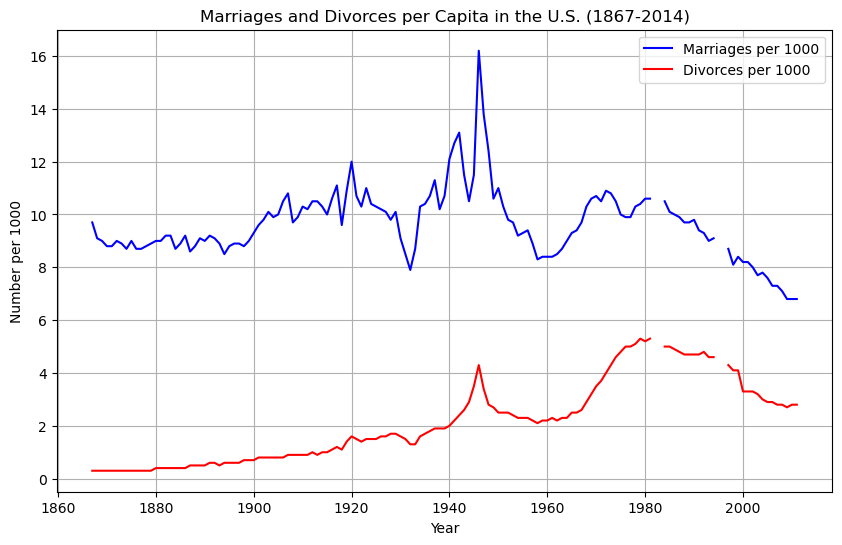

In [115]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
file_path = 'us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)

# Creating a line plot for Marriages and Divorces per 1000 population
plt.figure(figsize=(10, 6))


plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000', color='blue')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000', color='red')

# Adding labels and legend
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Number per 1000')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

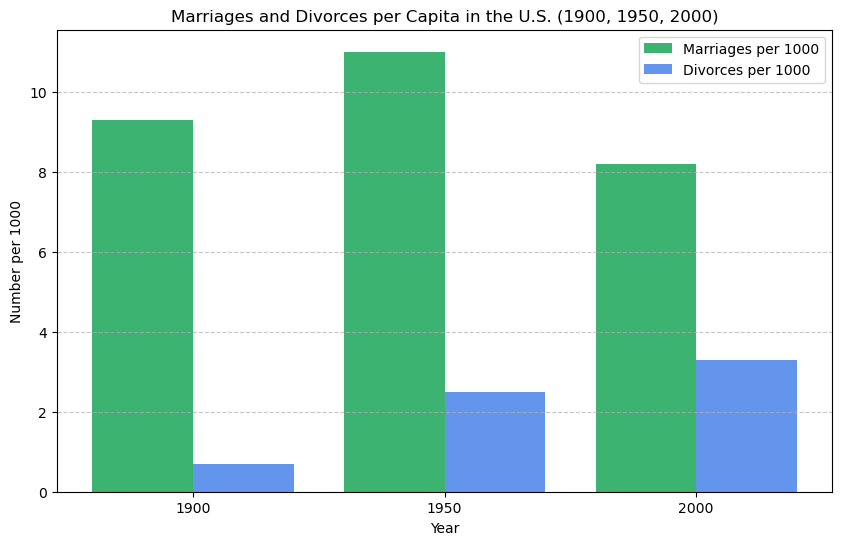

In [110]:

import pandas as pd
import matplotlib.pyplot as plt

file_path = 'us-marriages-divorces-1867-2014.csv'
data = pd.read_csv(file_path)

# Filtering the dataset for the years 1900, 1950, and 2000
selected_years = data[data['Year'].isin([1900, 1950, 2000])]


plt.figure(figsize=(10, 6))
x = range(len(selected_years))  

# Creating visuals
plt.bar(x, selected_years['Marriages_per_1000'], width=0.4, label='Marriages per 1000', color='mediumseagreen', align='center')
plt.bar([i + 0.4 for i in x], selected_years['Divorces_per_1000'], width=0.4, label='Divorces per 1000', color='cornflowerblue', align='center')

# Adding labels and title
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xlabel('Year')
plt.ylabel('Number per 1000')
plt.xticks([i + 0.2 for i in x], selected_years['Year'])  # Adjust x-ticks to be between the groups
plt.legend()

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
Question 8

In [ ]:
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

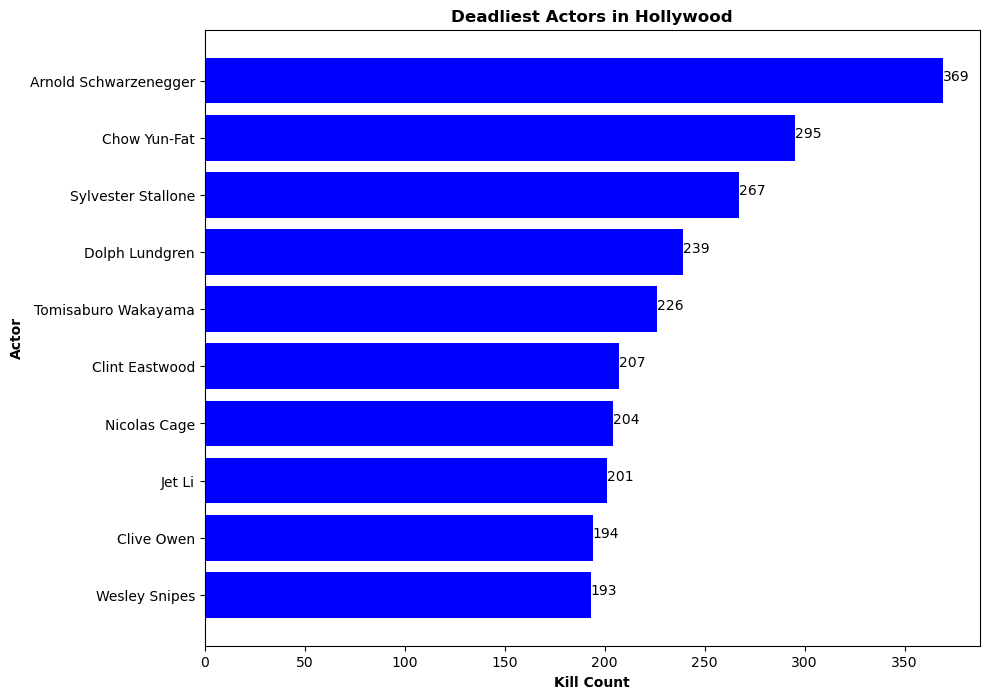

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'actor_kill_counts.csv'
data = pd.read_csv(file_path)

data_sorted = data.sort_values(by='Count', ascending=True)

plt.figure(figsize=(10, 8))

plt.barh(data_sorted['Actor'], data_sorted['Count'], color='blue')

plt.xlabel('Kill Count', fontweight='bold')
plt.ylabel('Actor', fontweight='bold')
plt.title('Deadliest Actors in Hollywood', fontweight='bold')

for index, value in enumerate(data_sorted['Count']):
    plt.text(value, index, str(value))

plt.show()


In [ ]:
Question 9

In [ ]:
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

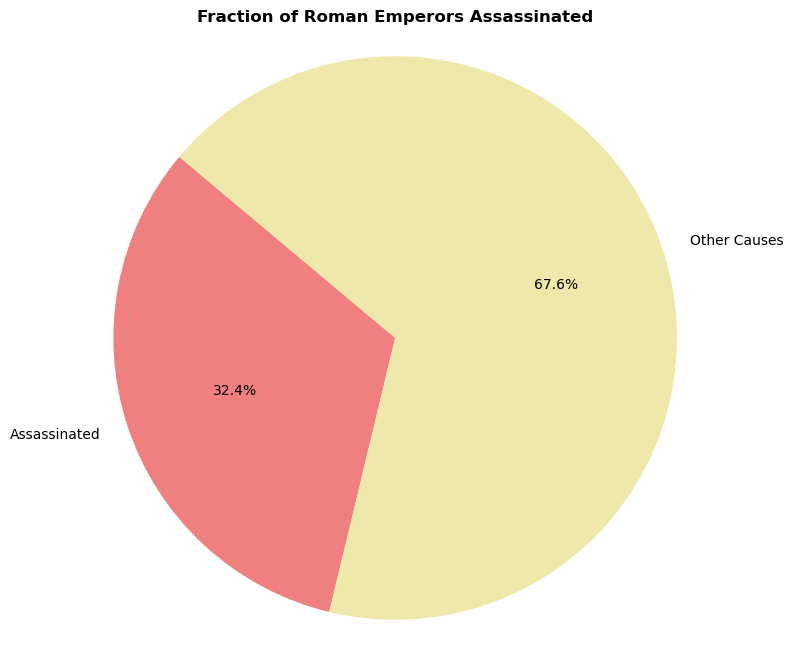

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
file_path = 'roman-emperor-reigns.csv'
data = pd.read_csv(file_path)

assassinated = data[data['Cause_of_Death'] == 'Assassinated'].shape[0]
total = data.shape[0]
other_deaths = total - assassinated

# Labels and data for the pie chart
labels = ['Assassinated', 'Other Causes']
sizes = [assassinated, other_deaths]
colors = ['lightcoral', 'palegoldenrod']  # Softer light colors
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Fraction of Roman Emperors Assassinated', fontweight='bold')
plt.show()


In [ ]:
Question 10

In [ ]:
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes! Color each dot according to its year.

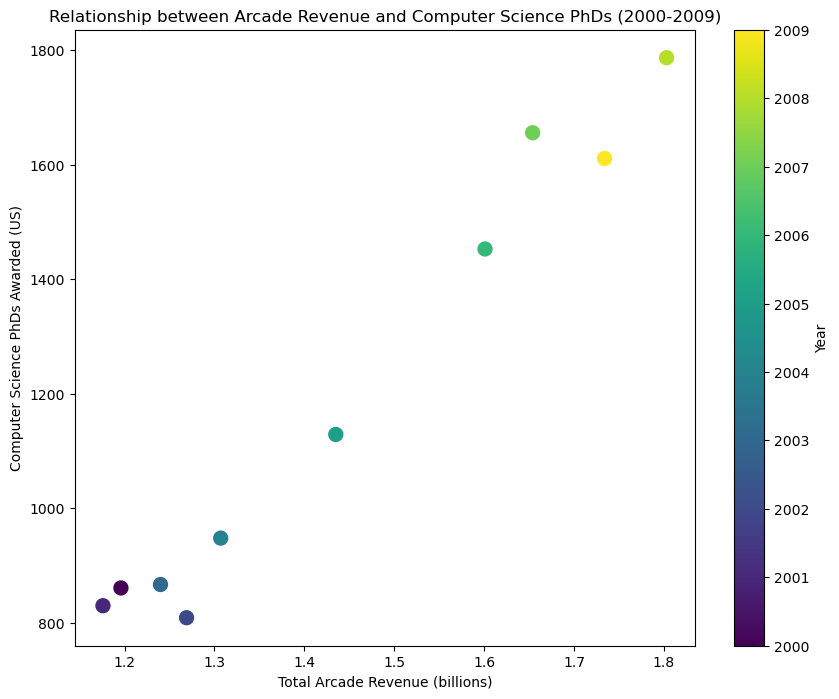

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
file_path = 'arcade-revenue-vs-cs-doctorates.csv'
data = pd.read_csv(file_path)

# Filtering the data for years between 2000 and 2009
filtered_data = data[(data['Year'] >= 2000) & (data['Year'] <= 2009)]

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    filtered_data['Total Arcade Revenue (billions)'],
    filtered_data['Computer Science Doctorates Awarded (US)'],
    c=filtered_data['Year'], 
    cmap='viridis', 
    s=100
)

plt.colorbar(scatter, label='Year')
# Adding axis labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science PhDs Awarded (US)')
plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)')
plt.show()
